## 1. Problem Statement:

In this project, we will use the Covid-19 dataset to examine the probability of Transaction is fraud or not?

## 2. Objectives

• To build classification models that predict the future probabilities of the death number from such a pandemic,

• Which features were the most important ones affecting the models’ prediction?

## 3. Data Description: 
• sex: female or male,

• patient_type: hospitalized or not hospitalized,

• intubed: whether the patient was connected to the ventilator,

• pneumonia: whether the patient already had air sac inflammation or not,

• age: of the patient,

• pregnancy: whether the patient is pregnant or not,

• diabetes: whether the patient has diabetes or not,

• copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not,

• asthma: whether the patient has asthma or not,

• inmsupr: whether the patient is immunosuppressed or not,

• hypertension: whether the patient has hypertension or not,

• other_disease: whether the patient has other diseases or not,

• cardiovascular: whether the patient has heart or blood vessels related disease,

• obesity: whether the patient is obese or not,

• renal_chronic: whether the patient has any chronic renal disease or not,

• tobacco: whether the patient is a tobacco user or not,

• classification: covid test findings, values between 1-3 mean the patient was diagnosed with covid in different 
degrees, 4 or higher means the patient is not a covid carrier or the test is inconclusive,

• icu: whether the patient was admitted to an Intensive Care Unit,

• date_died: if the date is 9999-99-99, it means the patient didn’t die, and if there is an actual date, it means the 
patient died.

## 3. Creating Spark Session

In [0]:
!pip install --upgrade pip

In [0]:
!pip install -q findspark


In [0]:
from pyspark.sql import SparkSession

In [0]:
spark = SparkSession.builder.appName('covid').getOrCreate()

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.0 
 Master 
 local[8] 
 AppName 
 Databricks Shell

## 4. Importing PySpark ML Libraries

In [0]:
import pandas as pd
import numpy as np
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

## 5. Loading the Data

In [0]:
covid_sdf = spark.read.csv("/FileStore/tables/covid.csv", inferSchema=True, header=True)

In [0]:
covidData = covid_sdf.toPandas()

## 6. EDA

In [0]:
# data analysis
covid_sdf = spark.read.csv("/FileStore/tables/covid.csv", inferSchema=True, header=True)
covidData = covid_sdf.toPandas()
%pip install ydata-profiling==4.0.0
from ydata_profiling import ProfileReport
ProfileReport(covidData, title="Profiling Report")

Python interpreter will be restarted.
Python interpreter will be restarted.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<iframe width="100%" height="800px" srcdoc="<!doctype html><html lang=en><head><meta charset=utf-8><meta name=viewport content="width=device-width, initial-scale=1, shrink-to-fit=no"><meta name=description content="Profile report generated by YData! Visit us at https://ydata.ai"><meta name=author content="YData and the open source community."><meta name=generator content="Pandas Profiling vv4.0.0"><meta name=url content=https://github.com/ydataai/ydata-profiling><meta name=date content="2023-05-04 14:56:42.780535"><title>Profiling Report</title><style>
/*!
 * Bootstrap v3.3.7 (http://getbootstrap.com)
 * Copyright 2011-2016 Twitter, Inc.
 * Licensed under MIT (https://github.com/twbs/bootstrap/blob/master/LICENSE)
 *//*! normalize.css v3.0.3 | MIT License | github.com/necolas/normalize.css */html{font-family:sans-serif;-webkit-text-size-adjust:100%;-ms-text-size-adjust:100%}body{margin:0}article,aside,details,figcaption,figure,footer,header,hgroup,main,menu,nav,section,summary{display:block}audio,canvas,progress,video{display:inline-block;vertical-align:baseline}audio:not([controls]){display:none;height:0}[hidden],template{display:none}a{background-color:transparent}a:active,a:hover{outline:0}abbr[title]{border-bottom:1px dotted}b,strong{font-weight:700}dfn{font-style:italic}h1{margin:.67em 0;font-size:2em}mark{color:#000;background:#ff0}small{font-size:80%}sub,sup{position:relative;font-size:75%;line-height:0;vertical-align:baseline}sup{top:-.5em}sub{bottom:-.25em}img{border:0}svg:not(:root){overflow:hidden}figure{margin:1em 40px}hr{height:0;-webkit-box-sizing:content-box;-moz-box-sizing:content-box;box-sizing:content-box}pre{overflow:auto}code,kbd,pre,samp{font-family:monospace,monospace;font-size:1em}button,input,optgroup,select,textarea{margin:0;font:inherit;color:inherit}button{overflow:visible}button,select{text-transform:none}button,html input[type=button],input[type=reset],input[type=submit]{-webkit-appearance:button;cursor:pointer}button[disabled],html input[disabled]{cursor:default}button::-moz-focus-inner,input::-moz-focus-inner{padding:0;border:0}input{line-height:normal}input[type=checkbox],input[type=radio]{-webkit-box-sizing:border-box;-moz-box-sizing:border-box;box-sizing:border-box;padding:0}input[type=number]::-webkit-inner-spin-button,input[type=number]::-webkit-outer-spin-button{height:auto}input[type=search]{-webkit-box-sizing:content-box;-moz-box-sizing:content-box;box-sizing:content-box;-webkit-appearance:textfield}input[type=search]::-webkit-search-cancel-button,input[type=search]::-webkit-search-decoration{-webkit-appearance:none}fieldset{padding:.35em .625em .75em;margin:0 2px;border:1px solid silver}legend{padding:0;border:0}textarea{overflow:auto}optgroup{font-weight:700}table{border-spacing:0;border-collapse:collapse}td,th{padding:0}/*! Source: https://github.com/h5bp/html5-boilerplate/blob/master/src/css/main.css */@media print{*,:after,:before{color:#000!important;text-shadow:none!important;background:0 0!important;-webkit-box-shadow:none!important;box-shadow:none!important}a,a:visited{text-decoration:underline}a[href]:after{content:" (" attr(href) ")"}abbr[title]:after{content:" (" attr(title) ")"}a[href^="javascript:"]:after,a[href^="#"]:after{content:""}blockquote,pre{border:1px solid #999;page-break-inside:avoid}thead{display:table-header-group}img,tr{page-break-inside:avoid}img{max-width:100%!important}h2,h3,p{orphans:3;widows:3}h2,h3{page-break-after:avoid}.navbar{display:none}.btn>.caret,.dropup>.btn>.caret{border-top-color:#000!important}.label{border:1px solid #000}.table{border-collapse:collapse!important}.table td,.table th{background-color:#fff!important}.table-bordered td,.table-bordered th{border:1px solid #ddd!important}}@font-face{font-family:'Glyphicons Halflings';src:url(../fonts/glyphicons-halflings-regular.eot);src:url(../fonts/glyphicons-halflings-regular.eot?#iefix) format('embedded-opentype'),url(../fonts/glyphicons-halflings-regular.woff2) format('woff2'),url(../fonts/glyp

Out[21]: 

#### Observations

This dataset consists of:

- 19 variables: 17 categorical variables and 2 numeric variables

- 1048575 observations or rows

- 2251636 missing values or 11.3% of the dataset

- 34636 duplicates or 3.3 % of the dataset

**Sex:**

- This is a categorical variable

- It has 2 unique values: 1 or female (525064 or 50.1% of the total observations) and 2 or male (523511 or 49.9% of the total observations)

- No missing values

**Patient_type:**

- This is a categorical variable

- It has 2 unique values: 1 or hospitalized (848544 or 80.9% of the total number of patients) and 2 or not hospitalized patients (200031 or 19.1% of the total number of patients)

- No missing values

**Intubed:**

- This is a categorical variable

- It has 2 unique values: 1 or patients connected to ventilators (33656 or 3.2 % of the total number of patients) and 2 or not connected to ventilators patients (159050 or 3.2 % of the total number of patients)

- 855869 or 81.6% of the info are missing values in this column

**Pneumonia:**

- This is a categorical variable

- It has 2 unique values: 1 or patients who already had air sac inflammation (140038 or 13.4 % of the total number of patients) and 2 or already did not have air sac inflammation patients (892534 or 3.2 % of the total number of patients)

- 16003 or 1.5 % of the info are missing values in this column

**Age:**

- This is a numerical variable

- It has 119 distinct age values

- 221 missing values

- The average age is this dataset is 41.78

- The minimum age is 0 (3862 patients) which is weird but at the same time it cannot be by faut because 3862 patients have age 0

- The maximum age is 121

- The median is 40 which means that 50 % of patients are aged less than 40 and the other 50% are age more than 40 years old

- 2.6% of the patients are aged 30

- The skewness is equal to 0.27 >0 which means this variable is right skewed

- No negative values

**Pregnancy:**

- This is a categorical variable

- It has 3 unique values: 1 or pregnant (8131 or 0.8 % of the total number of patients), 2 or not pregnant (513179 or 48.9 % of the total number of patients), and 98 which means the value is missing (3754 or 0.4 % of the total values)

- Also 523511 or 49.9% % of the info is missing added to the 0.4% which means more than half of the values in this column are missing.

**Diabetes:**

- This is a categorical variable

- It has 3 unique values: 1 or diabetes patients (124989 or 11.9 % of the total number of patients) and non diabetes patients (9202248 or 87.8 % of the number of patients) and 98 which means the value is missing (3338 or 0.3 % of the total values)

- No other missing values

**Copd:**

- This is a categorical variable

- It has 3 unique values: 1 or patients with chronic obstructive pulmonary disease(15062 or 1.4 % of the total number of patients) and 2 or patients without chronic obstructive pulmonary disease (1030510 or 98.3 % of the number of patients) and 98 which means the value is missing (3003 or 0.3 % of the total values)

- No other missing values

**Asthmas:**

- This is a categorical variable

- It has 3 unique values: 1 or patients with asthma disease(31571 or 3 % of the total number of patients) and 2 or patients without asthma disease (1014024 or 96.7 % of the number of patients) and 98 which means the value is missing (2979 or 0.3 % of the total values)

- No other missing values

**Inmsupr:**

- This is a categorical variable

- It has 3 unique values: 1 or immunosuppressed patients(14170 or 1.4 % of the total number of patients) and 2 or unimmunosuppressed patients (1031001 or 98.3 % of the number of patients) and 98 which means the value is missing (3404 or 0.3 % of the total values)

- No other missing values

**Hypertension:**

- This is a categorical variable

- It has 3 unique values: patients with hypertension (162729 or 15.5 % of the total number of patients) and 2 or without hypertension patients (882742 or 84.2 % of the number of patients) and 98 which means the value is missing (3104 or 0.3 % of the total values)

- No other missing values

**Other_disease**

- This is a categorical variable

- It has 3 unique values: patients with other disease (28040 or 2.7 % of the total number of patients) and 2 or without other disease (1015490 or 96.8 % of the number of patients) and 98 which means the value is missing (5045 or 0.5 % of the total values)

- No other missing values

**Cardiovascular:**

- This is a categorical variable

- It has 3 unique values: patients with cardiovascular disease (20769 or 2 % of the total number of patients) and 2 or without cardiovascular disease patients (1024730 or 97.7 % of the number of patients) and 98 which means the value is missing (3076 or 0.3 % of the total values)

- No other missing values

**Obesity:**

- This is a categorical variable

- It has 3 unique values: obese patients (159816 or 15.2% of the total number of patients) and 2 or without non-obese patients (885727 or 84.2 % of the number of patients) and 98 which means the value is missing (3032 or 0.3 % of the total values)

- No other missing values

**Renal_chronic:**

- This is a categorical variable

- It has 3 unique values: patients with renal chronic disease (18904 or 1.8 % of the total number of patients) and 2 or without renal chronic disease patients (1026665 or 97.9 % of the number of patients) and 98 which means the value is missing (3006 or 0.3 % of the total values)

- No other missing values

**Tabacco:**

- This is a categorical variable

- It has 3 unique values: smokers (84376 or 8% of the total number of patients) and 2 or non-smoker patients (960979 or 91. % of the number of patients) and 98 which means the value is missing (3220 or 0.3 % of the total values)

- No other missing values

**Classification:**

- This is a categorical variable

- It has 7 distinct age values

- No missing values

- No negative values

- No 0s

- The average classification is this dataset is 5.3

- The minimum is 1 (0.8% of the patients)

- The maximum is 7(the majority or 47.6% of the patients)

- The median is 6 which means that 50 % of patients are classified less than 6 and the other 50% are more than 6

- 36.4% of the patients are classified as 3 and 12% as 6

- The skewness is equal to -0.4249 <0 which means this variable is left skewed

**ICU:**

- This is a categorical variable

- It has 2 unique values: 1 or admitted to icu patients (16858 or 1.6% of the total number of patients) and 2 or not admitted to icu patients patients (175685 or 16.8% of the number of patients)

- 856032 or 81.6% of the values are missing

**Date_died:**

- This is a categorical variable

- There are 401 unique dates in this dataset

- 971633 or 92.7% of the dates are missing in this dataset which meas 92.7% of the patients died

**Correlation between variables:**

The heatmap shows a high positive correlation between:

- patient_type and 3 variables: icu, intubed and pneumonia

- Pregnancy and sex

- Copd, Asthma, Inmsupr, Hypertension, Cardiovascular, Obesity, Renal_chronic and Tabacco

### 7. Data Preprocessing

In [0]:
covidData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   sex             1048575 non-null  int32  
 1   patient_type    1048575 non-null  int32  
 2   intubed         192706 non-null   float64
 3   pneumonia       1032572 non-null  float64
 4   age             1048354 non-null  float64
 5   pregnancy       525064 non-null   float64
 6   diabetes        1048575 non-null  int32  
 7   copd            1048575 non-null  int32  
 8   asthma          1048575 non-null  int32  
 9   inmsupr         1048575 non-null  int32  
 10  hypertension    1048575 non-null  int32  
 11  other_disease   1048575 non-null  int32  
 12  cardiovascular  1048575 non-null  int32  
 13  obesity         1048575 non-null  int32  
 14  renal_chronic   1048575 non-null  int32  
 15  tobacco         1048575 non-null  int32  
 16  classification  1048575 non-null  in

In [0]:
# Now, for the date_died "9999-99-99" values means the patient is still alive. lets create a new column named death where 1 is dead and 2 is alive 
covidData["date_died"][covidData["date_died"]!='9999-99-99']=1
covidData["date_died"][covidData["date_died"]=='9999-99-99']=2
covidData["death"]=covidData["date_died"]
# lets drop the date_died
covidData.drop(columns=["date_died"], inplace=True)

In [0]:
covidData["death"].value_counts()

Out[282]: 2    971633
1     76942
Name: death, dtype: int64

In [0]:
# lets drop the columns "intubed" and "icu" since 81.6% of the info are missing values in each of these columns

covidData.drop(columns=["icu",'intubed'], inplace=True)


In [0]:
# lets fill the 98s in the pregnancy column based on the sex 
covidData.groupby(['sex','pregnancy'])['pregnancy'].value_counts()

Out[316]: sex  pregnancy  pregnancy
1    1.0        1.0            8131
     2.0        2.0          513179
     98.0       98.0           3754
Name: pregnancy, dtype: int64

**It is clearly seen that "98" values belongs to males and males cannot be pregnant so we will convert 98 to 2.**

In [0]:
covidData['pregnancy'].replace(98,2,inplace=True)

In [0]:
covidData["pregnancy"].fillna(covidData["pregnancy"].median(), inplace=True)

**In the following, we will fill all NAN and 98 in each column with the median.**

In [0]:
covidData["pneumonia"].fillna(covidData["pneumonia"].median(), inplace=True)

In [0]:
covidData["age"].fillna(covidData["age"].median(), inplace=True)

In [0]:
covidData["diabetes"].fillna(covidData["diabetes"].median(), inplace=True)

In [0]:
covidData["diabetes"].replace(98,covidData["diabetes"].median(),inplace=True)


In [0]:
covidData['copd'].replace(98,covidData['copd'].median(),inplace=True)

In [0]:
covidData['asthma'].replace(98,covidData['asthma'].median(),inplace=True)

In [0]:
covidData['inmsupr'].replace(98,covidData['inmsupr'].median(),inplace=True)

In [0]:
covidData['hypertension'].replace(98,covidData['hypertension'].median(),inplace=True)

In [0]:
covidData['other_disease'].replace(98,covidData['other_disease'].median(),inplace=True)

In [0]:
covidData['cardiovascular'].replace(98,covidData['cardiovascular'].median(),inplace=True)

In [0]:
covidData['obesity'].replace(98,covidData['obesity'].median(),inplace=True)

In [0]:
covidData['renal_chronic'].replace(98,covidData['renal_chronic'].median(),inplace=True)

In [0]:
covidData['tobacco'].replace(98,covidData['tobacco'].median(),inplace=True)

In [0]:
covidData.isnull().sum()

Out[304]: sex               0
patient_type      0
pneumonia         0
age               0
pregnancy         0
diabetes          0
copd              0
asthma            0
inmsupr           0
hypertension      0
other_disease     0
cardiovascular    0
obesity           0
renal_chronic     0
tobacco           0
classification    0
death             0
dtype: int64

In [0]:
covidData["death"]=covidData["death"].astype("int")
covidData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   sex             1048575 non-null  int32  
 1   patient_type    1048575 non-null  int32  
 2   pneumonia       1048575 non-null  float64
 3   age             1048575 non-null  float64
 4   pregnancy       1048575 non-null  float64
 5   diabetes        1048575 non-null  int32  
 6   copd            1048575 non-null  int32  
 7   asthma          1048575 non-null  int32  
 8   inmsupr         1048575 non-null  int32  
 9   hypertension    1048575 non-null  int32  
 10  other_disease   1048575 non-null  int32  
 11  cardiovascular  1048575 non-null  int32  
 12  obesity         1048575 non-null  int32  
 13  renal_chronic   1048575 non-null  int32  
 14  tobacco         1048575 non-null  int32  
 15  classification  1048575 non-null  int32  
 16  death           1048575 non-null  in

**In the previous steps, we handled all missing values and dtypes.**
**Now our data is ready for modeling.**

In [0]:
covidData.head()

sex 
 patient_type 
 pneumonia 
 age 
 pregnancy 
 diabetes 
 copd 
 asthma 
 inmsupr 
 hypertension 
 other_disease 
 cardiovascular 
 obesity 
 renal_chronic 
 tobacco 
 classification 
 death 
 
 
 
 
 0 
 1 
 1 
 1.0 
 65.0 
 2.0 
 2 
 2 
 2 
 2 
 1 
 2 
 2 
 2 
 2 
 2 
 3 
 1 
 
 
 1 
 2 
 1 
 1.0 
 72.0 
 2.0 
 2 
 2 
 2 
 2 
 1 
 2 
 2 
 1 
 1 
 2 
 5 
 1 
 
 
 2 
 2 
 2 
 2.0 
 55.0 
 2.0 
 1 
 2 
 2 
 2 
 2 
 2 
 2 
 2 
 2 
 2 
 3 
 1 
 
 
 3 
 1 
 1 
 2.0 
 53.0 
 2.0 
 2 
 2 
 2 
 2 
 2 
 2 
 2 
 2 
 2 
 2 
 7 
 1 
 
 
 4 
 2 
 1 
 2.0 
 68.0 
 2.0 
 1 
 2 
 2 
 2 
 1 
 2 
 2 
 2 
 2 
 2 
 3 
 1

### 8. Split the data into train and test sets

In [0]:
# let's define X and y
 
X=covidData.drop('death',axis=1)
y=covidData["death"]

In [0]:
X = pd.get_dummies(X,drop_first=True) # drop the first column 
y=covidData["death"].apply(lambda x : 1 if x==1 else 0)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [0]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X
 
    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### 9. Building the model

We are going to build 3 ensemble models here - Decision Tree Classifier, Random Forest Classifier and Gradient Boosting Classifier.

We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall. Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a death as a survival.

#### 1. Gradient Boosting Classifier

In [0]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

Out[356]: GradientBoostingClassifier(random_state=1)

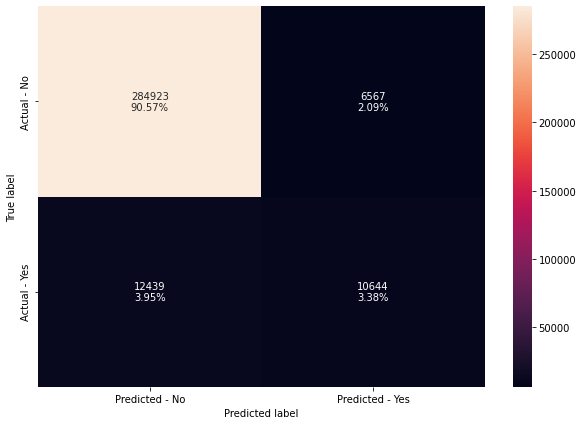

In [0]:
make_confusion_matrix(gbc,y_test)

In [0]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.9395069768202267
Accuracy on test set :  0.9395815915542656
Recall on training set :  0.46198406951484433
Recall on test set :  0.46111857210934454
Precision on training set :  0.6173121294068028
Precision on test set :  0.6184416942652955


### 2. Decision tree classifier

In [0]:
 dtree = DecisionTreeClassifier(criterion='gini',random_state=1)

In [0]:
dtree.fit(X_train, y_train)

Out[359]: DecisionTreeClassifier(random_state=1)

In [0]:
make_confusion_matrix(dtree,y_test)

In [0]:
#Using above defined function to get accuracy, recall and precision on train and test set
dtree_score=get_metrics_score(dtree)

Accuracy on training set :  0.9533311898332703
Accuracy on test set :  0.9326642782438417
Recall on training set :  0.5504186858278096
Recall on test set :  0.41615041372438594
Precision on training set :  0.7469888625711838
Precision on test set :  0.5549072843856507


### 3. Random Forest Classifier

In [0]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

Out[362]: RandomForestClassifier(random_state=1)

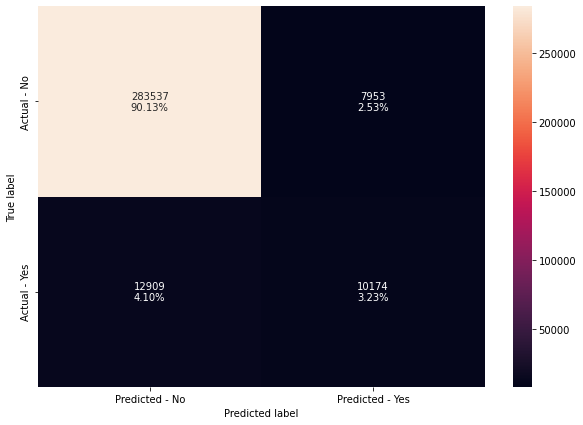

In [0]:
make_confusion_matrix(rf,y_test)

In [0]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_score=get_metrics_score(rf)

Accuracy on training set :  0.9533257402568386
Accuracy on test set :  0.933681530201257
Recall on training set :  0.5831894390909598
Recall on test set :  0.4407572672529567
Precision on training set :  0.7267468764460898
Precision on test set :  0.5612622055497325


## 10. Comparing all models

In [0]:
# defining list of models
models = [gbc, dtree,rf]
 
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
 
# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [0]:
comparison_frame = pd.DataFrame({'Model':[
                                          'Gradient Boosting with default parameters',
                                          'Decision Tree with default                                                       parameters','Random Forest with default parameters'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

Model 
 Train_Accuracy 
 Test_Accuracy 
 Train_Recall 
 Test_Recall 
 Train_Precision 
 Test_Precision 
 
 
 
 
 0 
 Gradient Boosting with default parameters 
 0.939507 
 0.939582 
 0.461984 
 0.461119 
 0.617312 
 0.618442 
 
 
 1 
 Decision Tree with default ... 
 0.953331 
 0.932664 
 0.550419 
 0.416150 
 0.746989 
 0.554907 
 
 
 2 
 Random Forest with default parameters 
 0.953326 
 0.933682 
 0.583189 
 0.440757 
 0.726747 
 0.561262

**Gradient Boosting With default parameters has as better test accuracy among these 3 models. The other models overfit on the train set**

## 11. Feature importance of Gbc classifier

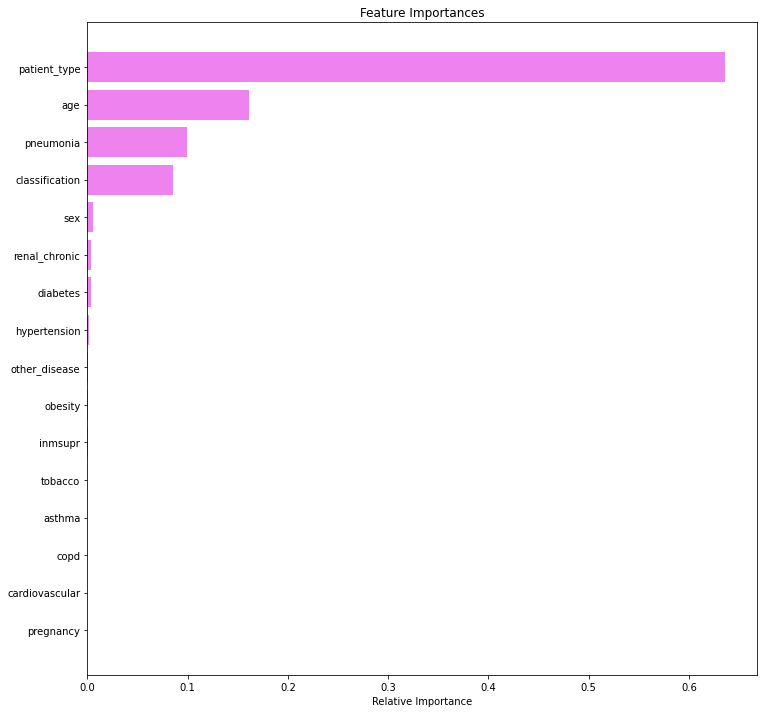

In [0]:
feature_names = X_train.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)
 
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observation:
patient_type is  the most important feature in identifying if a patient will die or no.**

## 13. Conclusion
1. A patient that is hospitalized or not is the most important feature in identifying if a patient will die.
2. Based on the results of the models' comparision, Gradident boosting classifier is a good model with 93% accuracy to predict the future probabilities of the death number from a covid pandemic